In [6]:
%load_ext autoreload
%autoreload 2

import tello
import detection
import depth
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
drone = tello.Tello()

Tello: 17:38:04.768:  Info: start video thread
Tello: 17:38:04.768:  Info: send connection request (cmd="conn_req:9617")
Tello: 17:38:04.768:  Info: state transit State::disconnected -> State::connecting
Tello: 17:38:04.773:  Info: video receive buffer size = 425984
Tello: 17:38:04.820:  Info: connected. (port=9617)
Tello: 17:38:04.820:  Info: send_time (cmd=0x46 seq=0x01e4)
Tello: 17:38:04.820:  Info: state transit State::connecting -> State::connected


In [ ]:
def generate_depth_image(prediction):
    prediction = cv2.resize(prediction, (frame.shape[1], frame.shape[0]), interpolation=cv2.INTER_CUBIC)
    depth_min = prediction.min()
    depth_max = prediction.max()
    return (255 * (prediction - depth_min) / (depth_max - depth_min)).astype("uint8")

f=10
for frame in drone.get_video_frames():
    cv2.imwrite("pics/pic"+str(f)+".jpg", frame)
    print("PIC"+str(f)+" ", frame.shape)
    annotated_frame, detections = detection.detect_objects(frame)
    display(detections)
    cv2.imwrite("localizer_det/pic_det"+str(f)+".jpg", annotated_frame)
    print("ANNOTATED FRAME TYPE", type(annotated_frame), annotated_frame.shape)
    #detections is a Pandas dataframe. Save it to do some work
    detections.to_pickle("localizer_det/dets"+str(f)+".pkl")
    
    depths = depth.detect_depth(frame)
  #  cv2.imwrite("localizer_depth/pic_depth"+str(f)+".jpg", frame)
    display(depths)
    depth_image = generate_depth_image(depths)
    cv2.imwrite("localizer_depth/pic_depth"+str(f)+".jpg", depth_image)
    print("DEPTH TYPE", type(depth_image), depth_image.shape)
    #plt.show(depth_image)
    if f>12:
        break # exit after 3 frames
    f+=1


Tello: 17:38:07.956:  Info: get video stream
Tello: 17:38:07.957:  Info: start video (cmd=0x25 seq=0x01e4)
Tello: 17:38:07.990:  Info: recv: ack: cmd=0x34 seq=0x0000 cc 60 00 27 90 34 00 00 00 00 72 a5
Tello: 17:38:07.991:  Info: recv: ack: cmd=0x20 seq=0x0000 cc 60 00 27 b0 20 00 00 00 00 42 b9
Tello: 17:38:07.991:  Info: recv: ack: cmd=0x34 seq=0x0000 cc 60 00 27 90 34 00 00 00 00 72 a5
Tello: 17:38:07.991:  Info: recv: ack: cmd=0x20 seq=0x0000 cc 60 00 27 b0 20 00 00 00 00 42 b9
Tello: 17:38:10.797:  Info: video data 932629 bytes 451.0KB/sec loss=1014


non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existing PPS 0 referenced
decode_slice_header error
no frame!
non-existing PPS 0 referenced
non-existi

Tello: 17:38:12.798:  Info: video data 749656 bytes 365.9KB/sec loss=1


error while decoding MB 54 35, bytestream -10
error while decoding MB 39 23, bytestream -14


Tello: 17:38:14.800:  Info: video data 750985 bytes 366.3KB/sec
Tello: 17:38:16.801:  Info: video data 752672 bytes 367.3KB/sec
Tello: 17:38:18.801:  Info: video data 755475 bytes 368.8KB/sec
Tello: 17:38:20.803:  Info: video data 745242 bytes 363.7KB/sec
PIC10  (720, 960, 3)


YOLOv5 🚀 2022-7-29 Python-3.10.5 torch-1.12.0+cu102 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


detections          xmin        ymin        xmax        ymax  confidence  class  \
0  287.820404  271.136932  442.224365  383.949097    0.884733     63   
1  457.006561   65.923256  527.150208  215.935379    0.683387     58   
2  436.232422  412.641357  510.202728  435.216705    0.665702     65   
3    0.834475  337.457672  176.318115  486.066925    0.410216     56   
4  374.667114  212.196365  678.649475  396.450256    0.253281     57   

           name  
0        laptop  
1  potted plant  
2        remote  
3         chair  
4         couch  


,xmin,ymin,xmax,ymax,confidence,class,name
0,287.820404,271.136932,442.224365,383.949097,0.884733,63,laptop
1,457.006561,65.923256,527.150208,215.935379,0.683387,58,potted plant
2,436.232422,412.641357,510.202728,435.216705,0.665702,65,remote
3,0.834475,337.457672,176.318115,486.066925,0.410216,56,chair
4,374.667114,212.196365,678.649475,396.450256,0.253281,57,couch


ANNOTATED FRAME TYPE <class 'numpy.ndarray'> (720, 960, 3)
Tello: 17:38:22.802:  Info: video data 762104 bytes 372.1KB/sec
Tello: 17:38:24.803:  Info: video data 747422 bytes 364.9KB/sec
Tello: 17:38:26.803:  Info: video data 752520 bytes 367.4KB/sec
Tello: 17:38:28.830:  Info: video data 754955 bytes 363.6KB/sec
Tello: 17:38:30.831:  Info: video data 750981 bytes 366.6KB/sec
Tello: 17:38:32.884:  Info: video recv: 1460 bytes e100 +181
Tello: 17:38:32.894:  Info: video data 713632 bytes 339.5KB/sec
Tello: 17:38:34.897:  Info: video data 813656 bytes 394.8KB/sec
Tello: 17:38:36.899:  Info: video data 751036 bytes 366.1KB/sec


array([[     5.6671,       5.646,       5.614, ...,      6.4742,      6.4092,      6.3637],
       [     5.6638,       5.649,      5.6266, ...,       6.473,      6.4316,      6.4026],
       [     5.6583,      5.6532,      5.6457, ...,       6.473,       6.467,      6.4627],
       ...,
       [     41.291,      41.304,      41.325, ...,      36.227,      36.279,      36.317],
       [     41.358,      41.374,      41.397, ...,      36.357,      36.398,      36.426],
       [     41.398,      41.417,      41.443, ...,      36.443,      36.476,      36.497]], dtype=float32)

Tello: 17:38:38.149:  Info: video recv: 1460 bytes 8500 +181
DEPTH TYPE <class 'numpy.ndarray'> (720, 960)
Tello: 17:38:38.900:  Info: video data 757043 bytes 369.5KB/sec
Tello: 17:38:40.901:  Info: video data 745269 bytes 363.8KB/sec
Tello: 17:38:42.901:  Info: video data 758401 bytes 370.3KB/sec
Tello: 17:38:44.901:  Info: video data 754851 bytes 368.5KB/sec
Tello: 17:38:46.901:  Info: video data 748733 bytes 365.6KB/sec
Tello: 17:38:48.902:  Info: video data 742472 bytes 362.5KB/sec
Tello: 17:38:50.931:  Info: video data 763569 bytes 367.5KB/sec
Tello: 17:38:52.933:  Info: video data 751077 bytes 366.3KB/sec
Tello: 17:38:54.933:  Info: video data 756963 bytes 369.6KB/sec


YOLOv5 🚀 2022-7-29 Python-3.10.5 torch-1.12.0+cu102 CPU



PIC11  (720, 960, 3)


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


detections          xmin        ymin        xmax        ymax  confidence  class  \
0  288.421326  271.484802  443.163696  383.161682    0.872393     63   
1  457.497009   66.447075  526.250366  215.430771    0.670659     58   
2  435.499725  412.674896  507.241547  436.470367    0.580153     65   

           name  
0        laptop  
1  potted plant  
2        remote  


,xmin,ymin,xmax,ymax,confidence,class,name
0,288.421326,271.484802,443.163696,383.161682,0.872393,63,laptop
1,457.497009,66.447075,526.250366,215.430771,0.670659,58,potted plant
2,435.499725,412.674896,507.241547,436.470367,0.580153,65,remote


ANNOTATED FRAME TYPE <class 'numpy.ndarray'> (720, 960, 3)
Tello: 17:38:56.933:  Info: video data 751160 bytes 366.7KB/sec
Tello: 17:38:58.933:  Info: video data 752503 bytes 367.4KB/sec
Tello: 17:39:00.933:  Info: video data 754934 bytes 368.6KB/sec
Tello: 17:39:02.963:  Info: video data 752524 bytes 362.1KB/sec
Tello: 17:39:04.966:  Info: video data 752651 bytes 367.0KB/sec
Tello: 17:39:07.131:  Info: video recv: 1460 bytes 0600 +197
Tello: 17:39:07.131:  Info: video data 749582 bytes 338.1KB/sec
Tello: 17:39:09.136:  Info: video data 816627 bytes 397.6KB/sec
Tello: 17:39:11.145:  Info: video data 753979 bytes 366.7KB/sec


array([[     4.2818,      4.2747,      4.2637, ...,       7.904,      7.8201,      7.7625],
       [     4.2874,      4.2829,      4.2758, ...,      7.9017,      7.8475,      7.8101],
       [     4.2957,      4.2953,      4.2944, ...,      7.9002,      7.8906,      7.8837],
       ...,
       [     47.328,      47.319,      47.306, ...,      40.419,      40.501,      40.559],
       [     47.439,      47.418,      47.385, ...,      40.602,      40.688,      40.746],
       [     47.507,      47.479,      47.435, ...,      40.723,       40.81,      40.867]], dtype=float32)

DEPTH TYPE <class 'numpy.ndarray'> (720, 960)
Tello: 17:39:13.163:  Info: video data 757820 bytes 366.6KB/sec
Tello: 17:39:15.165:  Info: video data 751036 bytes 366.4KB/sec
Tello: 17:39:17.166:  Info: video data 756881 bytes 369.4KB/sec
Tello: 17:39:19.171:  Info: video data 746786 bytes 363.8KB/sec
Tello: 17:39:21.179:  Info: video data 752645 bytes 366.0KB/sec
Tello: 17:39:23.181:  Info: video data 758427 bytes 369.9KB/sec
Tello: 17:39:25.195:  Info: video data 753326 bytes 365.3KB/sec
Tello: 17:39:27.197:  Info: video data 752523 bytes 367.0KB/sec
Tello: 17:39:29.198:  Info: video data 755497 bytes 368.8KB/sec


YOLOv5 🚀 2022-7-29 Python-3.10.5 torch-1.12.0+cu102 CPU

Fusing layers... 


PIC12  (720, 960, 3)


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


detections          xmin        ymin        xmax        ymax  confidence  class  \
0  287.667145  270.949982  443.390381  384.232758    0.880145     63   
1  457.005157   65.962265  528.231812  215.963150    0.677913     58   
2  435.725494  413.370880  509.574585  435.426025    0.619190     65   
3   83.346619   42.905708  168.313187   88.434380    0.381744     63   

           name  
0        laptop  
1  potted plant  
2        remote  
3        laptop  


,xmin,ymin,xmax,ymax,confidence,class,name
0,287.667145,270.949982,443.390381,384.232758,0.880145,63,laptop
1,457.005157,65.962265,528.231812,215.963150,0.677913,58,potted plant
2,435.725494,413.370880,509.574585,435.426025,0.619190,65,remote
3,83.346619,42.905708,168.313187,88.434380,0.381744,63,laptop


ANNOTATED FRAME TYPE <class 'numpy.ndarray'> (720, 960, 3)
Tello: 17:39:31.198:  Info: video data 751115 bytes 366.6KB/sec
Tello: 17:39:33.198:  Info: video data 751127 bytes 366.7KB/sec


# Combining Detection data frame and Depth image data
First, we exampine the annotated detection image. Each red rectangle represents a unique identified object. \
Note that some of them have overlapping boundaries, and some are in fact a collection of objects.

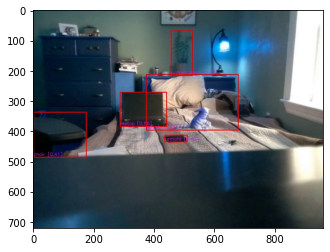

In [60]:
img_det = cv2.imread("localizer_det/pic_det10.jpg")
plt.imshow(img_det)

Next, we load the detections dataframe, and extract the X and Y boundaries of each detected object. \
These are used to annotate the depth image with the detected objects' boundaries.

,xmin,ymin,xmax,ymax,confidence,class,name
0,287.820404,271.136932,442.224365,383.949097,0.884733,63,laptop
1,457.006561,65.923256,527.150208,215.935379,0.683387,58,potted plant
2,436.232422,412.641357,510.202728,435.216705,0.665702,65,remote
3,0.834475,337.457672,176.318115,486.066925,0.410216,56,chair
4,374.667114,212.196365,678.649475,396.450256,0.253281,57,couch


original: 
[[[287, 271], [442, 383]], [[457, 65], [527, 215]], [[436, 412], [510, 435]], [[0, 337], [176, 486]], [[374, 212], [678, 396]]]


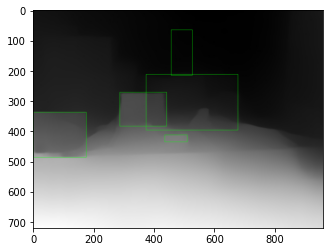

In [61]:
dt = pd.read_pickle("localizer_det/dets10.pkl")
display(dt)
img0 = cv2.imread("localizer_depth/pic_depth10.jpg")
bounds=[]
for row in dt.iterrows():
    r=row[1]
    xmin=int(r[0]); ymin= int(r[1]); xmax=int(r[2]); ymax=int(r[3])
    bounds.append([[xmin, ymin], [xmax, ymax]])
    cv2.rectangle(img0, (xmin, ymin), (xmax, ymax), (0, 255, 0))
print("original: ")
plt.imshow(img0)
print(bounds)

We can find the average depth of each object, by iterating over the depth image within the boundaries.

271 383 287 442
65 215 457 527
412 435 436 510
337 486 0 176
212 396 374 678
averaged depths: 


/usr/local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


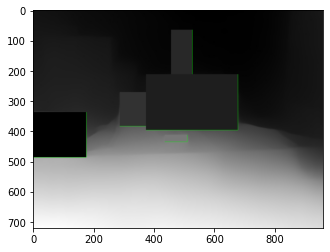

In [62]:
img=img0
bounds=np.asarray(bounds)
depth_avgs=[]
for obj in range(bounds.shape[0]): #bounds.shape[0]
    avg=[]
    xmin=bounds[obj][0,1]; ymin= bounds[obj][1,1]; xmax=bounds[obj][0,0]; ymax=bounds[obj][1,0]
    for x in range(xmin, xmax):
        for y in range(ymin, ymax):
            avg.append(img[x,y])
    avgdepth=np.mean(np.asarray(avg))
    depth_avgs.append(avgdepth)
    img[bounds[obj][0,1]:bounds[obj][1,1], bounds[obj][0,0]:bounds[obj][1,0]] = avgdepth
    print(bounds[obj][0,1], bounds[obj][1,1], bounds[obj][0,0], bounds[obj][1,0])
print("averaged depths: ")
plt.imshow(img)

Finally, we can add the average depths to the dataframe from earlier.

In [63]:
dt["depth"]=depth_avgs
display(dt)

,xmin,ymin,xmax,ymax,confidence,class,name,depth
0,287.820404,271.136932,442.224365,383.949097,0.884733,63,laptop,50.769068
1,457.006561,65.923256,527.150208,215.935379,0.683387,58,potted plant,40.519860
2,436.232422,412.641357,510.202728,435.216705,0.665702,65,remote,120.014444
3,0.834475,337.457672,176.318115,486.066925,0.410216,56,chair,NaN
4,374.667114,212.196365,678.649475,396.450256,0.253281,57,couch,30.763440
